In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:
dataset = pd.read_csv('kc_house_data.csv')

In [3]:
dataset['waterfront'] = dataset['waterfront'].fillna(0)

In [4]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [5]:
dataset.dropna(subset = ['view'], inplace = True)

In [6]:
dataset.yr_renovated.fillna(dataset.yr_built, inplace=True)

In [7]:
dataset['zipcode'] = dataset['zipcode'].apply(str)

In [8]:
dataset['sqft_basement'] = dataset['sqft_basement'].replace('?', np.nan)

In [9]:
cols_to_exclude = ['floors', 'waterfront', 'bedrooms', 'bathrooms', 'condition', 'grade', 'yr_built', 'yr_renovated', 'view']
for col in cols_to_exclude:
        dataset[col] = dataset[col].astype('category')

In [10]:
#dataset['floors'] = dataset['floors'].apply('str')

In [11]:
#dataset['waterfront'] = dataset['waterfront'].apply('str')

In [12]:
#dataset['bedrooms'] = dataset['bedrooms'].apply('str')

In [13]:
#dataset['bathrooms'] = dataset['bathrooms'].apply('str')

In [14]:
#dataset['condition'] = dataset['condition'].apply('str')

In [15]:
#dataset['grade'] = dataset['grade'].apply('str')

In [16]:
#dataset['yr_built'] = dataset['yr_built'].apply('str')

In [17]:
dataset['sqft_basement'] = dataset['sqft_basement'].astype(float)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21534 non-null  int64         
 1   date           21534 non-null  datetime64[ns]
 2   price          21534 non-null  float64       
 3   bedrooms       21534 non-null  category      
 4   bathrooms      21534 non-null  category      
 5   sqft_living    21534 non-null  int64         
 6   sqft_lot       21534 non-null  int64         
 7   floors         21534 non-null  category      
 8   waterfront     21534 non-null  category      
 9   view           21534 non-null  category      
 10  condition      21534 non-null  category      
 11  grade          21534 non-null  category      
 12  sqft_above     21534 non-null  int64         
 13  sqft_basement  21082 non-null  float64       
 14  yr_built       21534 non-null  category      
 15  yr_renovated   2153

In [43]:
X = dataset.drop('price', axis = 1).select_dtypes(exclude = ['object', 'category'])
y = dataset['price']
X = X.drop(['date'], axis = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
len(X_train), len(X_test), len(y_train), len(y_test)

(17227, 4307, 17227, 4307)

In [46]:
X_train.head()

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
15714,2450000275,1350,8113,1350,0.0,47.5807,-122.196,1930,8113
10920,1574700140,1830,9720,1150,680.0,47.5511,-122.230,3380,10854
2782,3601200465,3527,7200,3527,0.0,47.3823,-122.300,2490,7200
14991,5437400630,1920,8259,1920,0.0,47.5616,-122.088,2030,8910
19542,6169901095,1980,7200,1700,280.0,47.6318,-122.369,2490,4200


In [47]:
heatmap_data = pd.concat([y_train, X_train], axis = 1)
corr = heatmap_data.corr()

Text(0.5, 1.0, 'Heatmap of Correlation between Attributes and including Target')

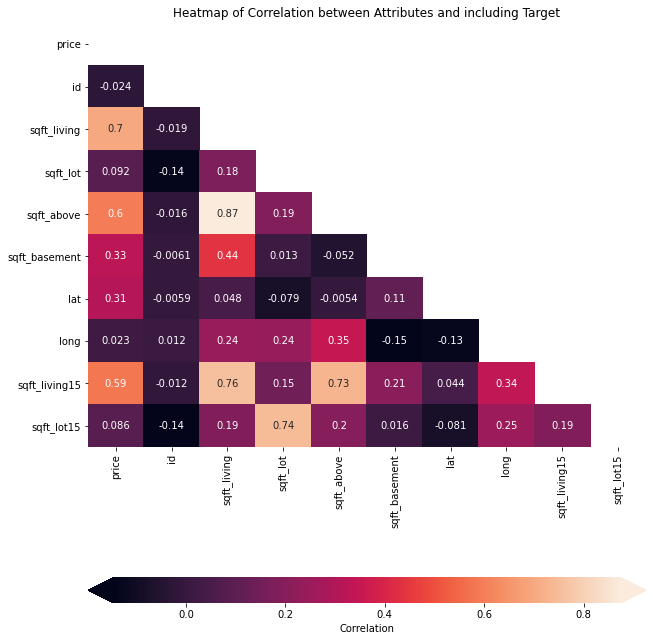

In [48]:
fig, ax = plt.subplots(figsize = (10, 12))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title('Heatmap of Correlation between Attributes and including Target')

In [49]:
most_correlated_feature = 'sqft_living'

Text(0.5, 1.0, 'Most Correlated Feature vs. Price')

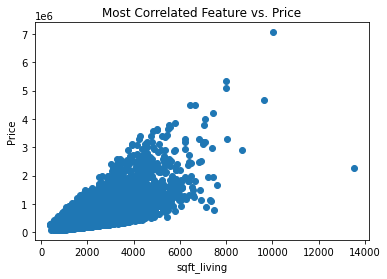

In [50]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel('Price')
ax.set_title('Most Correlated Feature vs. Price')

In [51]:
baseline_model = LinearRegression()

In [52]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits = 3, test_size = 0.25, random_state = 0)

baseline_scores = cross_validate(
        estimator = baseline_model,
        X = X_train[[most_correlated_feature]],
        y = y_train,
        return_train_score = True,
        cv = splitter
)
print('Train score:   ', baseline_scores['train_score'].mean())
print('Validation score:', baseline_scores['test_score'].mean())

Train score:    0.4789802131125122
Validation score: 0.4951977608112963


IndexError: index 2 is out of bounds for axis 0 with size 2

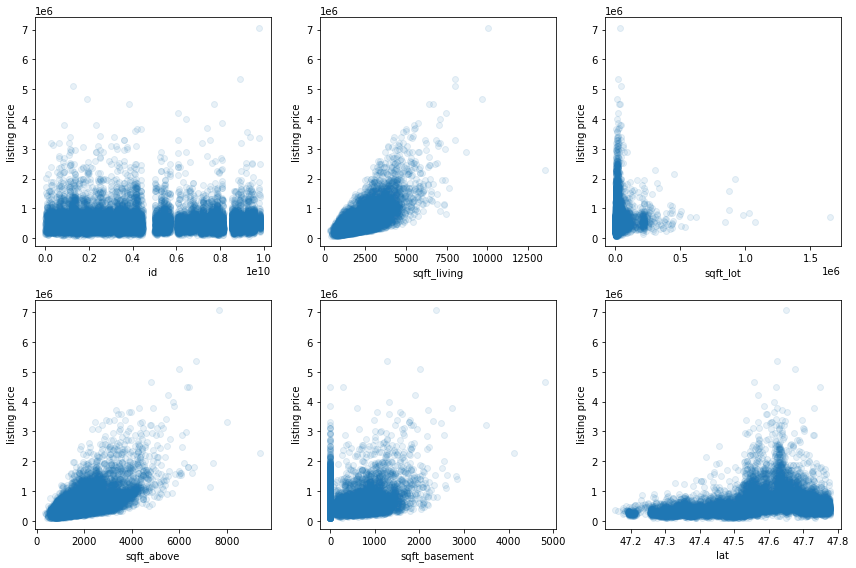

In [53]:
scatterplot_data = X_train

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], y_train, alpha=0.1)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")